In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture

C:\Users\Abhinay.Verma\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Abhinay.Verma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:,2:]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [14]:
def plotAicBicGraph(data,covariance_type):
    n_components = np.arange(1, 21)
    models = [GaussianMixture(n, covariance_type=covariance_type, random_state=42).fit(X) for n in n_components]
    plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components');
    plt.savefig('GAUSSIAN_BIC_AIC_GRAPH.png')

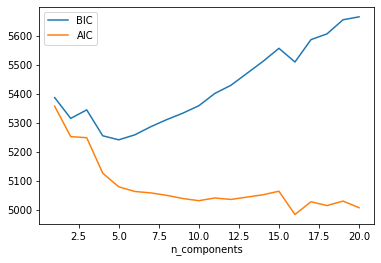

In [19]:
plotAicBicGraph(X,'full')

In [129]:
def dataintocsv(data, clusters):
    data['Clusters'] = clusters
    data.to_csv('Final_Gaussian_Clustered_Data.csv')
    return data

In [133]:
def save_model(model, filename):
    with open(filename+'.sav','wb') as f:
        pickle.dump(model,f)
    return 'success'

In [134]:
def gaussianModel(data, n_components, max_iter, init_params):
    gm = GaussianMixture(n_components=n_components, 
                     max_iter=max_iter, 
                     tol=1e-4,
                     init_params=init_params)
    clusters = gm.fit_predict(X)
    save_model(clusters, 'Gaussian_Mixture')
    dataintocsv(data, clusters)
    for i in range(len(set(clusters))):
        plt.scatter(data.iloc[:,0],data.iloc[:,1], c=clusters, cmap='rainbow')
        plt.savefig('Clustered_Gaussian_Scatter_Graph.png')
    return clusters

<IPython.core.display.Javascript object>

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

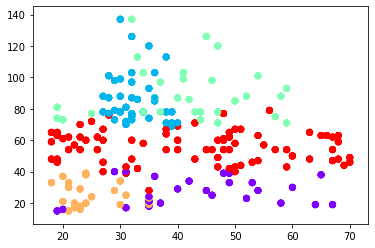

In [135]:
gaussianModel(X,5,1000,'kmeans')

5


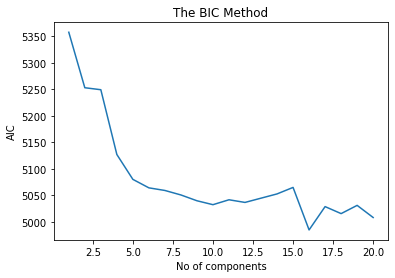

In [125]:
lst1 = []
for i in range(1,21):
    gauss = GaussianMixture(n_components=i, covariance_type='full',random_state=42, init_params='kmeans')
    g = gauss.fit(X)
    lst1.append(g.aic(X))
plt.plot(range(1,21),lst1) # creating the graph between WCSS and the number of clusters
plt.title('The BIC Method')
plt.xlabel('No of components')
plt.ylabel('AIC')
kn = KneeLocator(range(1, 21), lst1, curve = 'convex',direction = 'decreasing')
print(str(kn.knee))

In [121]:
silhouette_scores = [] 

for n_cluster in range(1, 11):
    silhouette_scores.append(silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = range(1,11)
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [113]:
g.max()

19

In [ ]:
    lst1.append(g.bic(X))
plt.plot(range(1,21),lst1) # creating the graph between WCSS and the number of clusters
plt.title('The BIC Method')
plt.xlabel('No of components')
plt.ylabel('BIC')
kn = KneeLocator(range(1, 21), lst1, curve='convex', direction='decreasing')
print(str(kn.knee))

In [91]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [94]:
km_silhouette = []
for i in range(1,21):
    gauss = GaussianMixture(n_components=i, covariance_type='spherical',random_state=42).fit(X)
    g = gauss.fit_predict(X)
    silhouette = silhouette_score(X,g)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [106]:
km_silhouette = []
for i in range(1,11):
    gauss = GaussianMixture(n_components=i, covariance_type='spherical',random_state=42).fit(X)
    g = gauss.fit_predict(X)
    silhouette = silhouette_score(X,g)
    km_silhouette.append(silhouette)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [98]:
g

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 8, 1, 1, 1, 8, 1, 1, 5, 8, 8, 8, 5, 1, 8, 5, 1, 5, 8, 5, 1,
       8, 5, 1, 1, 5, 8, 5, 5, 5, 1, 8, 8, 1, 8, 8, 8, 5, 8, 1, 8, 8, 1,
       1, 8, 5, 1, 8, 8, 1, 1, 8, 1, 8, 1, 1, 8, 5, 1, 8, 1, 5, 8, 5, 5,
       5, 1, 8, 1, 1, 1, 5, 8, 8, 8, 1, 8, 8, 9, 3, 7, 3, 9, 3, 7, 3, 7,
       3, 7, 3, 9, 3, 7, 3, 7, 3, 9, 3, 9, 3, 9, 3, 7, 3, 9, 3, 9, 3, 7,
       3, 9, 3, 7, 3, 7, 3, 9, 3, 9, 3, 7, 3, 9, 3, 7, 3, 7, 3, 9, 3, 9,
       3, 7, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 6, 4, 6, 4,
       6, 4], dtype=int64)

In [102]:
silhouette = silhouette_score(X,g)
km_silhouette.append(silhouette)

In [104]:
km_silhouette

[0.3680118213132137]

In [103]:
print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Silhouette score for number of cluster(s) 10: 0.3680118213132137


ValueError: x and y must be the same size

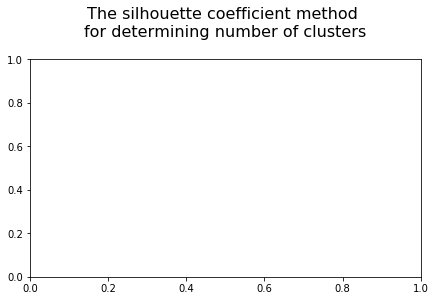

In [107]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(1,11)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(1,11)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [83]:
g.weights_

array([0.10882382, 0.15190752, 0.11574808, 0.16925086, 0.05711696,
       0.08783776, 0.02009678, 0.06992907, 0.15133288, 0.06795627])

In [49]:
g.

array([[24.65693656, 24.68803682, 81.33572257],
       [25.05279388, 53.97258594, 51.01515276],
       [44.89395821, 26.53750403, 21.40754804],
       [40.85916733, 79.64669392, 10.88942174],
       [31.42508794, 96.63197819, 80.65846072],
       [67.23579824, 55.90697899, 49.83384466],
       [42.76654143, 97.50208291, 25.09839125],
       [34.62490838, 75.37076373, 73.79894968],
       [49.21064491, 54.68323783, 49.09915999],
       [33.38545548, 77.16679733, 91.25724239]])

In [89]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)# fitting the data to the KMeans Algorithm

In [90]:
wcss

[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75350.77917248776,
 58300.443321590676,
 51084.50595493435,
 44307.87341670445,
 40573.69766497867,
 37085.62797727233]

In [63]:
lst1.append(g.bic(X))
lst1

[5359.218968878548]

In [88]:
lst1

[5470.056005554157,
 5473.941310451333,
 5376.749517223882,
 5319.805499233454,
 5316.221948856386,
 5240.82898027466,
 5220.144660989938,
 5224.821073221344,
 5240.5291436347925,
 5242.569496515988,
 5259.483464423845,
 5274.748125491212,
 5298.982318705276,
 5305.14073285667,
 5317.968790588635,
 5325.007567656446,
 5343.638973681095,
 5358.058573072542,
 5376.3942785265735,
 5400.877553262467]

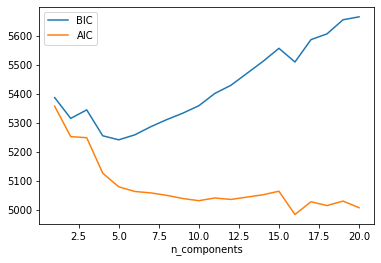

In [34]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [21]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Initialize KMeans and GaussianMixture models
kmeans = KMeans(n_clusters=5, 
                max_iter=1000,
                tol=1e-4)
gm = GaussianMixture(n_components=5, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='kmeans')

# Fit and predict the algorithms
y_kmeans = kmeans.fit_predict(X)
y_gm = gm.fit_predict(X)
y_gm_proba = gm.predict_proba(X)

In [25]:
y_gm

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int64)

In [24]:
y_gm.max()

4

In [20]:
dataset['labels']=y_gm

In [24]:
fig = px.scatter_3d(dataset, x= X[:,0],y= X[:,1],z= X[:,2],
              color=dataset['labels'])
fig.show()

In [8]:
data

,0,1,2
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18
